In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from collections import defaultdict

import sys
if "../" not in sys.path:
  sys.path.append("../")

import gym
import plotting
from lib.envs.blackjack import BlackjackEnv
matplotlib.style.use('ggplot')

In [2]:
env = BlackjackEnv()

## On-Policy MC Control

In [8]:
#Create an initial epsilon soft policy
def epsilon_greedy_policy(Q, epsilon, state, nA):
    A = np.ones(nA, dtype=float) * epsilon / nA
    best_action = np.argmax(Q[state])
    A[best_action] += (1.0 - epsilon)
    return A


In [16]:
def mc_control_epsilon_greedy(env, num_episodes, discount_factor=1.0, epsilon=0.1, debug=False):
  
    
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    
    for i_episode in range(1, num_episodes + 1):
        
        if debug:
            if i_episode % 100000 == 0:
                print("\rEpisode {}/{}.".format(i_episode, num_episodes))
                
        state = env.reset()
        start = True
        state_action_pairs_in_episode = []
        states_in_episode = []
        while(True):
            probs=epsilon_greedy_policy(Q, epsilon, state, env.action_space.n)
            action = np.random.choice(np.arange(len(probs)), p=probs)
            next_state, reward, end, _ = env.step(action)
            state_action_pairs_in_episode.append(((state, action),reward))
            states_in_episode.append(state)
            if end:
                break
            state = next_state
        
        for ((st,act), reward) in state_action_pairs_in_episode:
            first_occurence_idx = next(i for i,(s_a,r) in enumerate(state_action_pairs_in_episode) if s_a==(st,act))
            G = sum([r for ((s,a),r) in state_action_pairs_in_episode[first_occurence_idx:]])
            
            #Calculate average of the returns
            returns_sum[(st,act)] += G
            returns_count[(st,act)] += 1.0
            Q[st][act] = returns_sum[(st,act)] / returns_count[(st,act)]
        
    
    return Q, epsilon_greedy_policy

Q, optimal_policy = mc_control_epsilon_greedy(env, num_episodes=100000, debug=True)

[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.05  0.95]
[ 0.05  0.95]
[ 0.95

[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95

[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95

[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95

[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95

[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95

[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95

[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95

[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95

[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.05  0.95]
[ 0.95

[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95

[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95

[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95

[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95

[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95

[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95

[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.05  0.95]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95

[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95

[ 0.05  0.95]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95

[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95

[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.05

[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95

[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95

[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95

[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.05  0.95]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05

[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05

[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.05  0.95]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95

[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05

[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95

[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95

[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.05  0.95]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95

[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.05

[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95

[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.05  0.95]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.05  0.95]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95

[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95

[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.05

[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.05  0.95]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95

[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95

[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.05  0.95]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.05  0.95]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95

[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.05  0.95]
[ 0.95  0.05]
[ 0.95  0.05]
[ 0.95  0.05]


KeyboardInterrupt: 

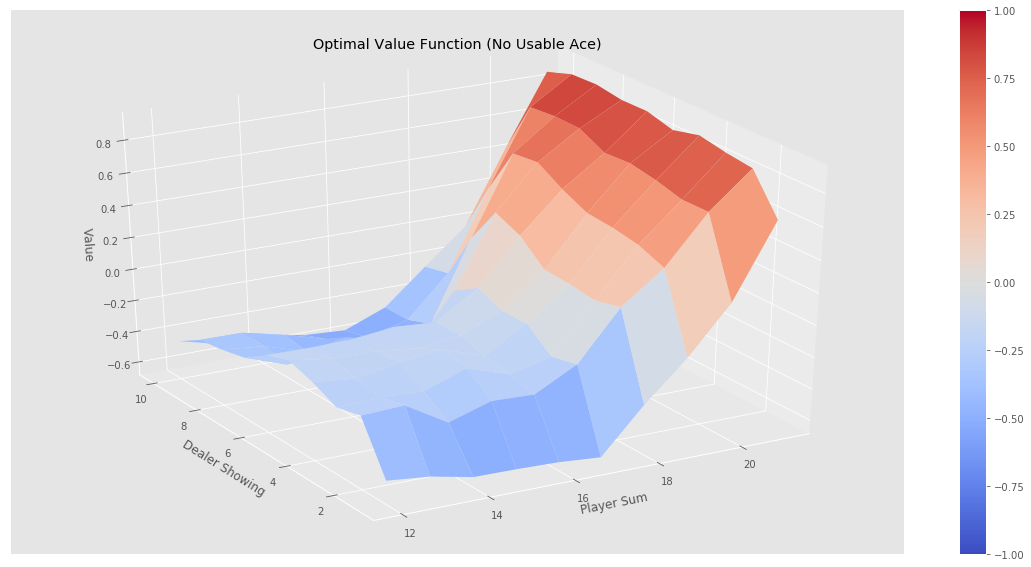

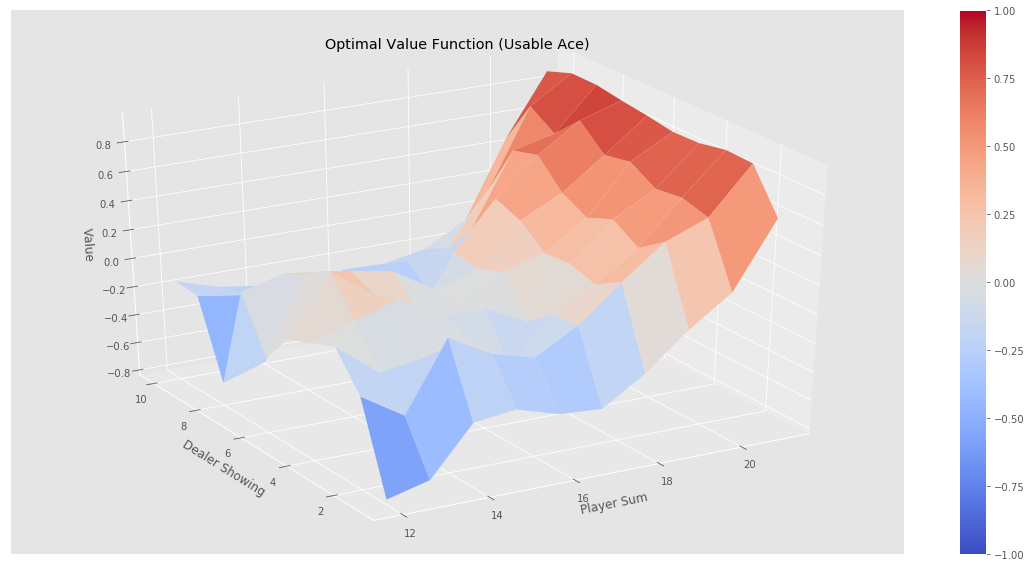

In [15]:
# Create value function from action-value function by picking the best action at each state
V = defaultdict(float)
for state, actions in Q.items():
    action_value = np.max(actions)
    V[state] = action_value

plotting.plot_value_function(V, title="Optimal Value Function")